In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount("/content/drive")
df=pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Datasets/Assignment-2_Data.csv"))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
df

,age,default,balance,housing,loan,day,duration,campaign,y,marital_married,marital_single,contact_telephone,contact_unknown,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,40.93641,0,2143.0,1,0,5,261,1,0,1,0,0,1,0,1,0,0,0,1
2,40.93641,0,2.0,1,1,5,76,1,0,1,0,0,1,1,0,0,0,0,1
3,47.00000,0,1506.0,1,0,5,92,1,0,1,0,0,1,0,0,1,0,0,1
4,33.00000,0,1.0,0,0,5,198,1,0,0,1,0,1,0,0,1,0,0,1
5,35.00000,0,231.0,1,0,5,139,1,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34.00000,0,557.0,0,0,17,224,1,1,0,1,0,0,1,0,0,0,0,1
45206,51.00000,0,825.0,0,0,17,977,3,1,1,0,0,0,0,1,0,0,0,1
45207,71.00000,0,1729.0,0,0,17,456,2,1,0,0,0,0,0,0,0,0,0,1
45209,57.00000,0,668.0,0,0,17,508,4,0,1,0,1,0,1,0,0,0,0,1


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43135 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  43135 non-null  float64
 1   default              43135 non-null  int64  
 2   balance              43135 non-null  float64
 3   housing              43135 non-null  int64  
 4   loan                 43135 non-null  int64  
 5   day                  43135 non-null  int64  
 6   duration             43135 non-null  int64  
 7   campaign             43135 non-null  int64  
 8   y                    43135 non-null  int64  
 9   marital_married      43135 non-null  uint8  
 10  marital_single       43135 non-null  uint8  
 11  contact_telephone    43135 non-null  uint8  
 12  contact_unknown      43135 non-null  uint8  
 13  education_secondary  43135 non-null  uint8  
 14  education_tertiary   43135 non-null  uint8  
 15  education_unknown    43135 non-null 

In [20]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.drop(df[df["job"].isnull()].index,axis=0,inplace=True)

In [12]:
df.drop(columns=["Id"],inplace=True)

In [14]:
df["balance"]=df["balance"].fillna(0)

In [19]:
df["age"]=df["age"].fillna(df['age'].mean())

In [16]:
df.drop(df[df["age"]<10].index,axis=0,inplace=True)

In [52]:
df.drop(columns=["pdays","month"],inplace=True)

<Axes: ylabel='Density'>

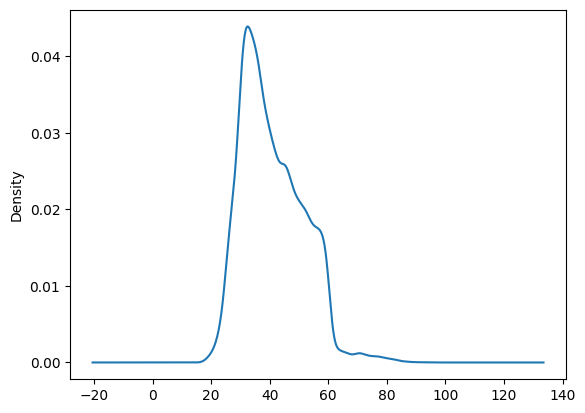

In [23]:
df["age"].plot(kind="kde")

In [27]:
df.drop(columns=["job"],inplace=True)

In [28]:
df["marital"].value_counts()

married     27213
single      12787
divorced     5207
Name: marital, dtype: int64

In [33]:
df["contact"].value_counts()

cellular     29282
unknown      13019
telephone     2906
Name: contact, dtype: int64

In [31]:
df["education"].value_counts()

secondary    23199
tertiary     13300
primary       6851
unknown       1857
Name: education, dtype: int64

In [32]:
df["poutcome"].value_counts()

unknown    36956
failure     4900
other       1840
success     1511
Name: poutcome, dtype: int64

In [35]:
df=pd.get_dummies(df,columns=["marital","contact","education","poutcome"],drop_first=True)

In [87]:
df

,age,default,balance,housing,loan,day,duration,campaign,y,marital_married,marital_single,contact_telephone,contact_unknown,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,40.93641,0,2143.0,1,0,5,261,1,0,1,0,0,1,0,1,0,0,0,1
2,40.93641,0,2.0,1,1,5,76,1,0,1,0,0,1,1,0,0,0,0,1
3,47.00000,0,1506.0,1,0,5,92,1,0,1,0,0,1,0,0,1,0,0,1
4,33.00000,0,1.0,0,0,5,198,1,0,0,1,0,1,0,0,1,0,0,1
5,35.00000,0,231.0,1,0,5,139,1,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34.00000,0,557.0,0,0,17,224,1,1,0,1,0,0,1,0,0,0,0,1
45206,51.00000,0,825.0,0,0,17,977,3,1,1,0,0,0,0,1,0,0,0,1
45207,71.00000,0,1729.0,0,0,17,456,2,1,0,0,0,0,0,0,0,0,0,1
45209,57.00000,0,668.0,0,0,17,508,4,0,1,0,1,0,1,0,0,0,0,1


In [43]:
df[["housing","loan"]].value_counts()

housing  loan
yes      no      20762
no       no      17202
yes      yes      4367
no       yes      2876
dtype: int64

In [48]:
df["y"].value_counts()

no     39921
yes     5286
Name: y, dtype: int64

In [39]:
df["default"]=np.where((df["default"]=="no"),0,1)

In [44]:
df["housing"]=np.where((df["housing"]=="no"),0,1)

In [45]:
df["loan"]=np.where((df["loan"]=="no"),0,1)

In [49]:
df["y"]=np.where((df["y"]=="no"),0,1)

In [85]:
df[["duration","balance"]].describe()

,duration,balance
count,43369.000000,43369.000000
mean,232.166132,1312.159400
std,187.479234,2420.128921
min,0.000000,-500.000000
25%,101.000000,83.000000
50%,176.000000,459.000000
75%,304.000000,1437.000000
max,1000.000000,24870.000000


In [84]:
df["duration"].value_counts()

124    182
90     181
122    175
139    173
114    173
      ... 
909      1
991      1
941      1
960      1
879      1
Name: duration, Length: 998, dtype: int64

In [91]:
df.drop(df[df["campaign"]>20].index,axis=0,inplace=True)

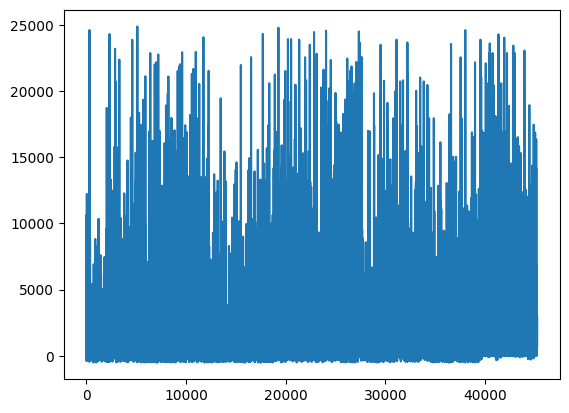

In [83]:
plt.plot(df["balance"])

In [93]:
df[["campaign","day"]].describe()

,campaign,day
count,43135.000000,43135.000000
mean,2.626290,15.752289
std,2.464172,8.304617
min,1.000000,1.000000
25%,1.000000,8.000000
50%,2.000000,16.000000
75%,3.000000,21.000000
max,20.000000,31.000000


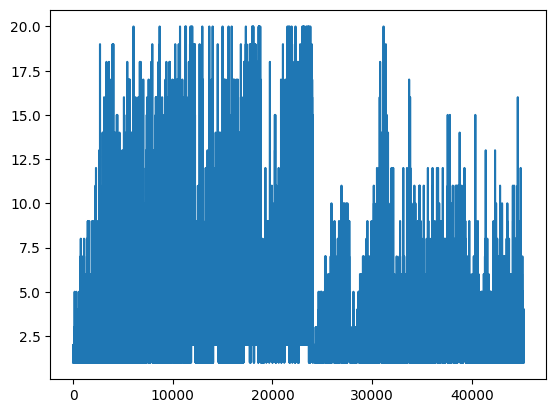

In [92]:
plt.plot(df["campaign"])

<Axes: ylabel='Density'>

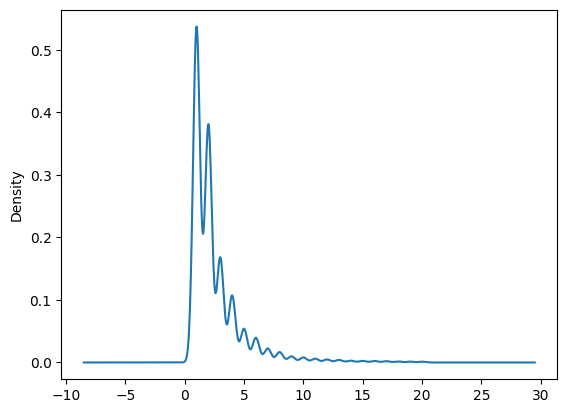

In [95]:
df["campaign"].plot(kind="kde")

In [105]:
X=df.drop(columns=["y"])
Y=df["y"]
X.head()

,age,default,balance,housing,loan,day,duration,campaign,marital_married,marital_single,contact_telephone,contact_unknown,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,40.93641,0,2143.0,1,0,5,261,1,1,0,0,1,0,1,0,0,0,1
2,40.93641,0,2.0,1,1,5,76,1,1,0,0,1,1,0,0,0,0,1
3,47.00000,0,1506.0,1,0,5,92,1,1,0,0,1,0,0,1,0,0,1
4,33.00000,0,1.0,0,0,5,198,1,0,1,0,1,0,0,1,0,0,1
5,35.00000,0,231.0,1,0,5,139,1,1,0,0,1,0,1,0,0,0,1


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
scaler=StandardScaler()

In [115]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model = Sequential()
model.add(Dense(32, input_dim=18, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                608       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [116]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
863/863 [==============================] - 3s 3ms/step - loss: 0.2582 - accuracy: 0.9026 - val_loss: 0.2250 - val_accuracy: 0.9093
Epoch 2/100
863/863 [==============================] - 3s 4ms/step - loss: 0.2299 - accuracy: 0.9055 - val_loss: 0.2232 - val_accuracy: 0.9110
Epoch 3/100
863/863 [==============================] - 2s 2ms/step - loss: 0.2262 - accuracy: 0.9055 - val_loss: 0.2215 - val_accuracy: 0.9106
Epoch 4/100
863/863 [==============================] - 2s 2ms/step - loss: 0.2237 - accuracy: 0.9075 - val_loss: 0.2237 - val_accuracy: 0.9113
Epoch 5/100
863/863 [==============================] - 2s 2ms/step - loss: 0.2233 - accuracy: 0.9058 - val_loss: 0.2202 - val_accuracy: 0.9121
Epoch 6/100
863/863 [==============================] - 2s 2ms/step - loss: 0.2216 - accuracy: 0.9073 - val_loss: 0.2217 - val_accuracy: 0.9115
Epoch 7/100
863/863 [==============================] - 2s 2ms/step - loss: 0.2208 - accuracy: 0.9072 - val_loss: 0.2203 - val_accuracy: 0.9096

In [117]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
y_log=model.predict(X_test_scaled)
y_pred=np.where(y_log>0.5,1,0)
accuracy = accuracy_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
pd.DataFrame({"accuracy": [accuracy], "r2": [r2], "mse": [mse]})

270/270 [==============================] - 0s 1ms/step


,accuracy,r2,mse
0,0.902168,-0.007668,0.097832


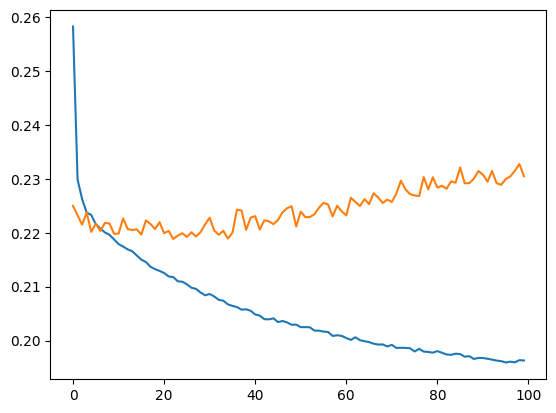

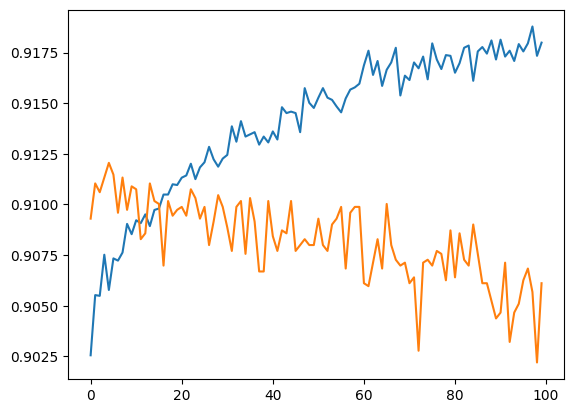

In [120]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()